In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Principle Component Analysis

First I will be using a Principle Component Analysis to simplify the dataset while still explaining a maximum amount of the varience.

In [41]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

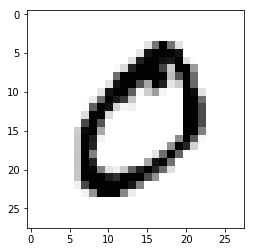

In [42]:
plt.imshow(X[1].reshape((28,28)), cmap='Greys')


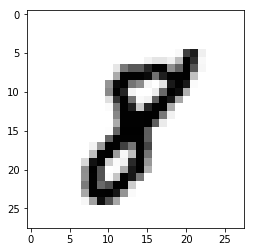

In [43]:
plt.imshow(X[17].reshape((28,28)), cmap='Greys')

In [44]:
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

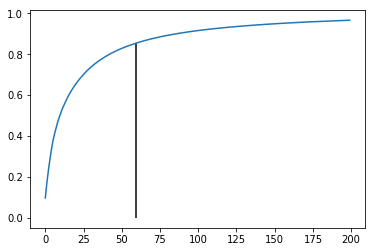

In [45]:
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[59],x=59)

I decided to use 87 of the components, allowing me to be able to explain 90% of the variance. 90% seems to be a reasonable bend in the graph showing how many components are needed, while still reducing the overall dimensionality of the model.

In [46]:
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 87)


In [57]:
print(pca.explained_variance_)

[334294.06141858 245433.42714427 210930.35458571 185337.3563191
 167691.57240407 147670.29662309 112445.13893067  99115.38328577
  94612.53876189  80335.95693768  72259.91131116  69888.55401389
  58552.70586367  58105.2757568   54310.38213844  50981.9785895
  45254.30567604  43870.48880605  40723.72476346  39545.99920588
  36565.41457692  34636.18258277  32899.11209852  31200.69647811
  30296.9449957   28771.66123482  27777.4204322   26950.30813599
  25391.16806522  23667.64747479  22505.89276121  22139.78233325
  20608.24294431  20086.62021524  19439.77996863  18641.17105068
  17311.91383403  16706.93832879  16428.27352292  16038.5718253
  15584.95051225  15260.79209582  14344.92737514  13588.51490255
  13161.26567147  12889.50688298  12397.00628598  11971.62560718
  11618.5734005   10965.65354322  10868.16745449  10638.04320531
  10169.34560923   9847.64698809   9690.28943065   9241.26224085
   9205.91899607   8798.33041824   8683.71672234   8391.48477463
   8221.8429385    8183.3842

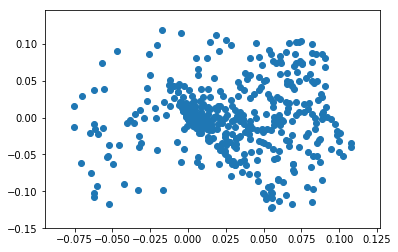

In [49]:
plt.scatter(pca.components_[0], pca.components_[1])

Looking at the graph of the first two components, it is first clear that there is the more variance in X than in Y. This makes sense, because the first component explains the maximum amount of variance, and the second component maximizes variance after. I notice some clustering near the middle.

PCA is a dimension reduction technique meant to mitigate the curse of dimensionality, (where data has so many variables, that everything is spaced out and therefore clustering and looking for similarity based on distance is difficult). Principle Component helps with that by projecting data onto the axis with the most variance; variance is critical for predictive power. It will create components to preserve variance and allow you to decide how much of the variance you want to preserve. However, the downfalls of PCA include loose of information and explicability. It isn't used as much in practice.

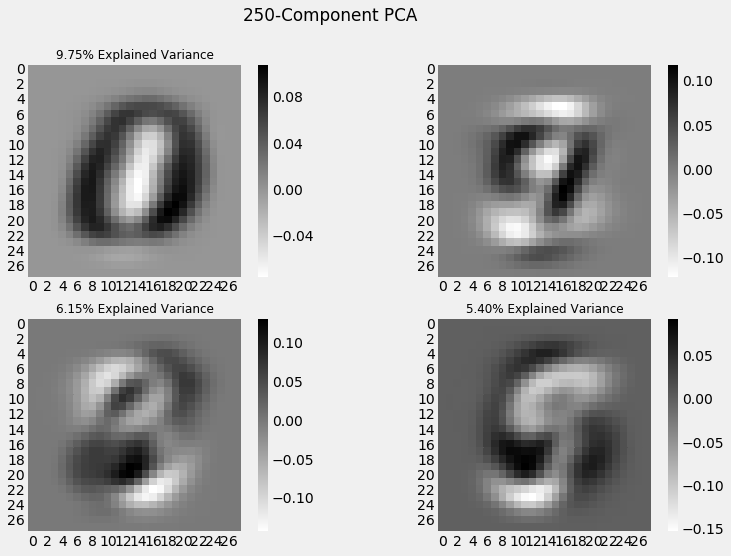

In [54]:
pca = PCA(n_components=250)
X_r = pca.fit(X).transform(X)

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(pca.components_[0, :].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca.components_[1, :].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca.components_[2, :].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca.components_[3, :].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')

axarr[0][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[1][0].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[2]*100),
    fontsize=12
)
axarr[1][1].set_title(
    "{0:.2f}% Explained Variance".format(pca.explained_variance_ratio_[3]*100),
    fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('250-Component PCA')
pass

The difference in the images before and after using PCA is the overall level of clarity. As the PCA explains less and less variance, the images become less distinct and less clear; they become fuzzy. Now I will be moving on to T-SNE.

## T-SNE

In [9]:

from sklearn.manifold import TSNE

In [16]:
from sklearn.manifold import TSNE
rows = np.arange(42000)
np.random.shuffle(rows)
n_select = 5000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.026s...
[t-SNE] Computed neighbors for 5000 samples in 10.101s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 448.839928
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.695389
[t-SNE] KL divergence after 1000 iterations: 1.443204


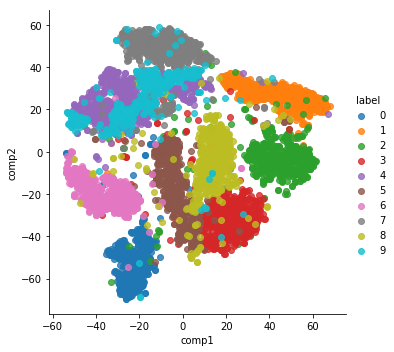

In [17]:
import seaborn as sns
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)


This graph is different than the PCA graph in that it is more distinctly clustered. Additionally, one variable doesn't inherently have more variance than another like in the PCA graph.

##### Changes in perpelxity 

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.024s...
[t-SNE] Computed neighbors for 5000 samples in 9.077s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 343.439940
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.612267
[t-SNE] KL divergence after 1000 iterations: 1.584352


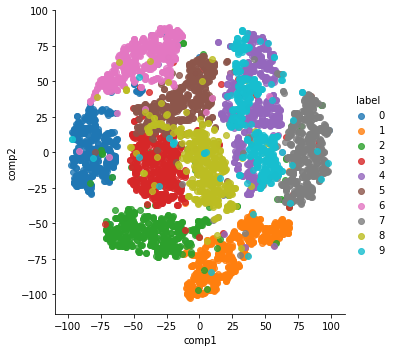

In [19]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.055s...
[t-SNE] Computed neighbors for 5000 samples in 9.960s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 419.303794
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.969528
[t-SNE] KL divergence after 1000 iterations: 1.509052


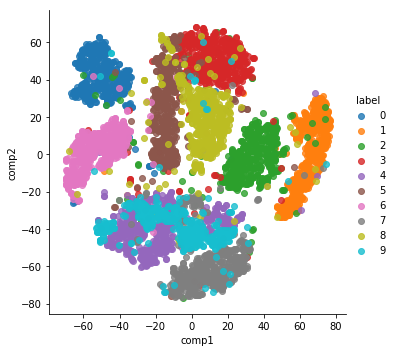

In [20]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

##### Learning Rate and Number of Iterations  

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.036s...
[t-SNE] Computed neighbors for 5000 samples in 9.337s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 448.839928
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.686508
[t-SNE] KL divergence after 500 iterations: 1.579796


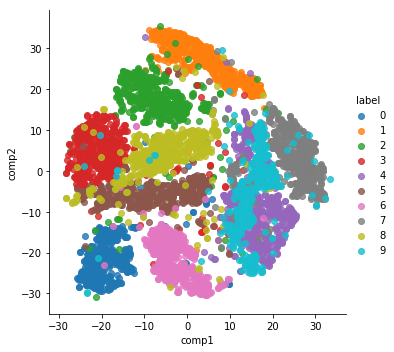

In [22]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500, learning_rate=100)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

Looking at the different TSNE plots, this model seems to be fairly robust to changes in perplexity and the learning rate/number of iterations. Each time it is able to successfully cluster the data according to its label, (getting a bit confused with 4s and 9s, understandably).

## K means Clustering


In [60]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import scale

In [67]:
X=pd.DataFrame(X)
X['target']=y

X_sub=X.sample(n=1000)

kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(X_sub)
sk_clusters = kmeans.predict(X_sub)
labels = kmeans.labels_
silhouette_score(X_sub, labels, metric='euclidean')

0.062150930546463146

I chose k=10 based off of prior knowledge. There are only 10 single digits k could be. My evaluated my model with a silhouette score. This isn't as bad as it could be, it just indicates that my clusters are overlapping a bit, which is seen in the following graphs. My general inclination would have been to scale because K means clustering uses distances, however, after scaling my data I ended up with a worse silhouette score, so I will not scale my set.

In [27]:
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 1000
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_sub)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.084s...
[t-SNE] Computed neighbors for 1000 samples in 2.954s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 633.461497
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.077896
[t-SNE] KL divergence after 1000 iterations: 1.035929


In [35]:
y=X_sub['target']

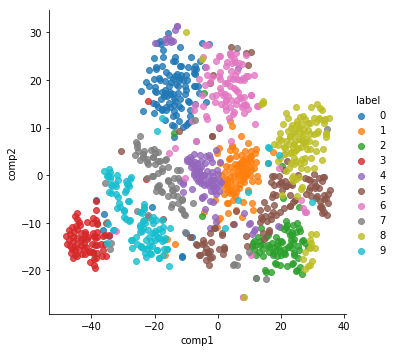

In [39]:
import seaborn as sns
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = kmeans.labels_
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)


After running my model several times, I am confident to say that it is robust. K means uses random selection to generate the model, so consistent results indicate that the model is performing well.

## Hierarchical clustering 

In [34]:

from scipy.cluster.hierarchy import dendrogram, linkage

In [32]:
Xh = X[:100, :2]
X_full = X[:100, :]

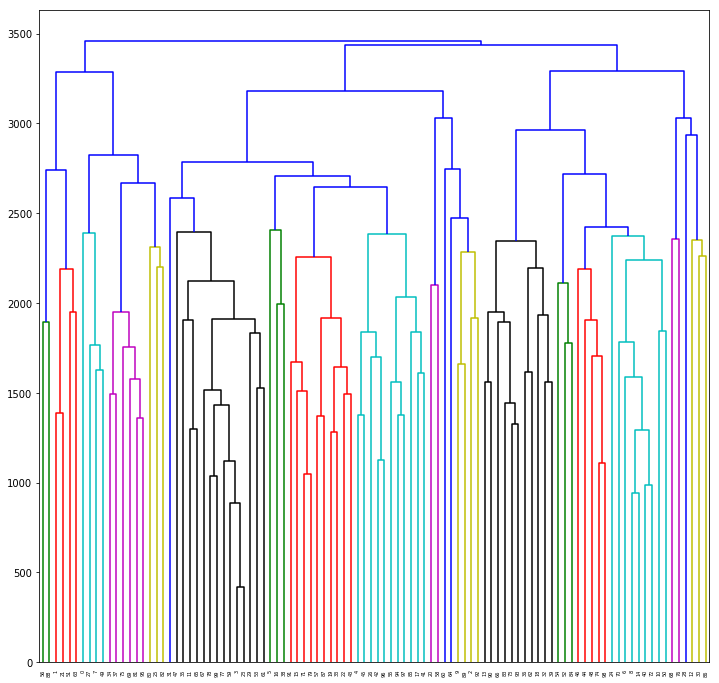

In [35]:
Z = linkage(X_full, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

From this graph, it looks like between 7 and 8 clusters are reasonable. 

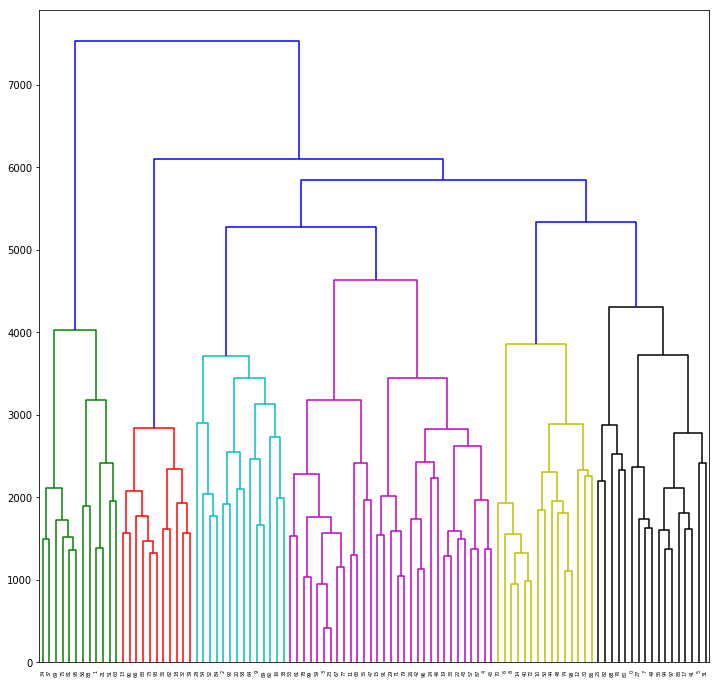

In [36]:
Z = linkage(X_full, 'ward')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

This graph seems to have 6 reasonable clusters. 

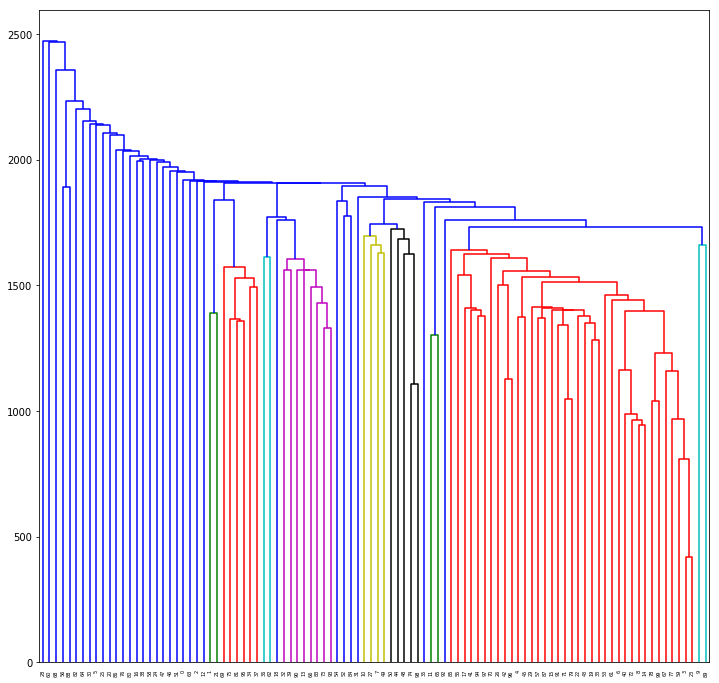

In [38]:
Z = linkage(X_full, 'single')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

This graph has far too many clusters to count.

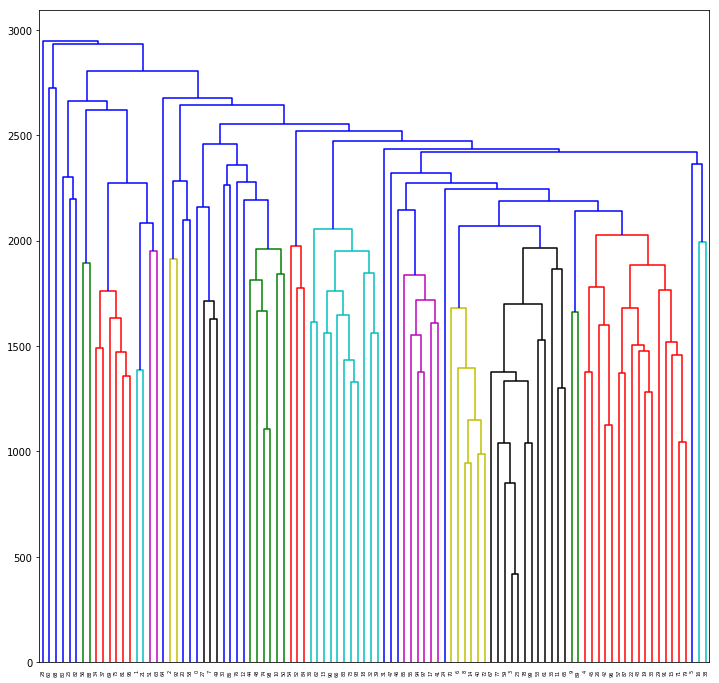

In [39]:
Z = linkage(X_full, 'average')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

This graph seems like it could have between 9 and 12 clusters.

The dendrogram changes fairly considerably with the different linkage methods. Using 'ward' had far cleaner results than using 'single' or 'mean'. And 'complete' seemed to be a combination of them all.